<a href="https://colab.research.google.com/github/AMoreira667/Portfolio_Ciencia_Dados/blob/main/Deep_Learning_IAGEN_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Blibliotecas

In [ ]:
from google.colab import drive
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, BatchNormalization, LeakyReLU
from keras.regularizers import L1, L2
from keras import layers
from keras.layers import Reshape
from keras.layers import Conv2DTranspose
from keras.layers import Conv2D
from keras import ops
import tensorflow as tf
from keras import Model
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.utils import image_dataset_from_directory

## Iniciando o Projeto

In [ ]:
# Montando unidade no Google Drive

drive.mount('/content/drive')

Mounted at /content/drive


## Deep Convolutional GAN's

### Dados

In [ ]:

# Importa a biblioteca keras, que é usada para construir e treinar modelos de deep learning
import keras

# Define o caminho das imagens no Google Drive
PATH_IMGS = '/content/drive/MyDrive/datasets-dl/classificacao-imagem-tipos-cenarios-pelo-mundo/train/forest'

# Cria um dataset de imagens a partir do diretório especificado, sem rótulos (label_mode=None), com tamanho de imagem 128x128 e batch de 32 imagens
dataset = keras.utils.image_dataset_from_directory(
    PATH_IMGS, label_mode=None, image_size=(128, 128), batch_size=32
)
# Normaliza as imagens para o intervalo [0, 1], dividindo os valores dos pixels por 255
dataset = dataset.map(lambda x: x / 255.0)

Found 2271 files.


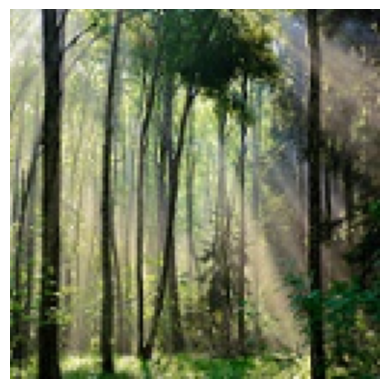

In [ ]:
# Importa a biblioteca matplotlib para plotagem de gráficos e visualização de imagens
import matplotlib.pyplot as plt

# Itera sobre o dataset e plota a primeira imagem para visualização
for x in dataset:
    plt.axis("off")  # Remove os eixos da plotagem
    plt.imshow((x.numpy() * 255).astype("int32")[0])  # Exibe a imagem (converte de volta para o intervalo [0, 255] e para o tipo int)
    break  # Sai do loop após exibir a primeira imagem

In [ ]:
# Redefine o dataset, agora com tamanho de imagem 64x64, para agilizar o treinamento
dataset = keras.utils.image_dataset_from_directory(
    PATH_IMGS, label_mode=None, image_size=(64, 64), batch_size=32
)

# Normaliza as imagens novamente para o intervalo [0, 1]
dataset = dataset.map(lambda x: x / 255.0)

Found 2271 files.


### Discriminador

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# prompt: Importar a regularização L1 do keras

from keras.regularizers import L2

In [ ]:
discriminator = keras.Sequential(
    [
        keras.Input(shape=(64, 64, 3)),
        layers.Conv2D(64, kernel_size=4, strides=2, padding="same",  kernel_regularizer=L2()),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same", kernel_regularizer=L2()),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(1, activation="sigmoid"),
    ],
    name="discriminator",
)

discriminator.summary()

Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)                   │ (None, 32, 32, 64)          │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_40 (LeakyReLU)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 16, 16, 128)         │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_41 (LeakyReLU)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │          32,769 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,105 (652.75 KB)

 Trainable params: 167,105 (652.75 KB)

 Non-trainable params: 0 (0.00 B)

### Gerador

In [ ]:
latent_dim = 128

generator = keras.Sequential(
    [
        keras.Input(shape=(latent_dim,)),
        layers.Dense(8 * 8 * 128),
        layers.Dense(8 * 8 * 128),
        layers.Reshape((8, 8, 128)),
        layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2DTranspose(1024, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2D(3, kernel_size=5, padding="same", activation="sigmoid"),
    ],

    name="generator",
)

generator.summary()

Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 8192)                │       1,056,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 8192)                │      67,117,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_12 (Reshape)                 │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_41                  │ (None, 16, 16, 256)         │         524,544 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_48 (LeakyReLU)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_42                  │ (None, 32, 32, 512)         │       2,097,664 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_49 (LeakyReLU)           │ (None, 32, 32, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_43                  │ (None, 64, 64, 1024)        │       8,389,632 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_50 (LeakyReLU)           │ (None, 64, 64, 1024)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 64, 64, 3)           │          76,803 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,262,467 (302.36 MB)

 Trainable params: 79,262,467 (302.36 MB)

 Non-trainable params: 0 (0.00 B)

### DCGAN

In [ ]:
# Importa operações do Keras necessárias para a definição da classe GAN
from keras import ops

class DCGAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super().__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim
        self.seed_generator = keras.random.SeedGenerator(1337)

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super().compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    def train_step(self, real_images):
        batch_size = ops.shape(real_images)[0]
        random_latent_vectors = keras.random.normal(
            shape=(batch_size, self.latent_dim), seed=self.seed_generator
        )
        generated_images = self.generator(random_latent_vectors)

        combined_images = ops.concatenate([generated_images, real_images], axis=0)

        labels = ops.concatenate(
            [ops.ones((batch_size, 1)), ops.zeros((batch_size, 1))], axis=0
        )

        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        random_latent_vectors = keras.random.normal(
            shape=(batch_size, self.latent_dim), seed=self.seed_generator
        )

        misleading_labels = ops.zeros((batch_size, 1))

        # Train the generator (note that we should *not* update the weights
        # of the discriminator)!
        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Update metrics
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {
            "d_loss": self.d_loss_metric.result(),
            "g_loss": self.g_loss_metric.result(),
        }

### Monitoramento

In [ ]:
import matplotlib.pyplot as plt
plt.ylim(0, 3)

In [ ]:
import matplotlib.pyplot as plt  # Importa a biblioteca matplotlib para plotagem de gráficos
import os # Import a biblioteca os para lidar com o sistema operacional
from tensorflow.keras.preprocessing.image import load_img, img_to_array

class GANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=3, latent_dim=128, type_gan='gan'):
        # Inicializa o callback com o número de imagens e a dimensão latente
        self.num_img = num_img
        self.latent_dim = latent_dim
        self.type_gan = type_gan
        # Define um gerador de semente para reprodutibilidade
        self.seed_generator = keras.random.SeedGenerator(42)
        # Cria o diretório para salvar as imagens geradas, se não existir
        if not os.path.exists(f'imgs_generate/{self.type_gan}'):
            os.makedirs(f'imgs_generate/{self.type_gan}')
        # Inicializa listas para armazenar as perdas do discriminador e do gerador
        self.d_losses = []
        self.g_losses = []

    def on_epoch_end(self, epoch, logs=None):
        # Cria um diretório para a época atual
        epoch_dir = os.path.join(f'imgs_generate/{self.type_gan}', f'epoch_{epoch:03d}')
        if not os.path.exists(epoch_dir):
            os.makedirs(epoch_dir)

        # Gera imagens a partir de vetores latentes aleatórios
        random_latent_vectors = keras.random.normal(
            shape=(self.num_img, self.latent_dim), seed=self.seed_generator
        )
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255  # Converte as imagens para a escala de 0-255
        generated_images = generated_images.numpy()  # Converte o tensor para numpy array

        # Salva cada imagem gerada na pasta da época atual
        for i in range(self.num_img):
            img = keras.utils.array_to_img(generated_images[i])
            img.save(os.path.join(epoch_dir, f'generated_img_{epoch:03d}_{i}.png'))

        # Armazena as perdas do discriminador e do gerador
        self.d_losses.append(logs["d_loss"])
        self.g_losses.append(logs["g_loss"])

        # Plota as curvas de aprendizado
        self.plot_learning_curves()

    def plot_learning_curves(self):
        # Cria uma figura para os gráficos de perda
        plt.figure(figsize=(10, 5))
        plt.ylim(0, 2)
        # Plota a perda do discriminador
        plt.plot(self.d_losses, label="Discriminator Loss")
        # Plota a perda do gerador
        plt.plot(self.g_losses, label="Generator Loss")
        # Adiciona rótulo ao eixo x
        plt.xlabel("Epoch")
        # Adiciona rótulo ao eixo y
        plt.ylabel("Loss")
        # Adiciona a legenda ao gráfico
        plt.legend()
        # Adiciona um título ao gráfico
        plt.title("Learning Curves")
        # Salva o gráfico em um arquivo
        plt.savefig(f'imgs_generate/{self.type_gan}/learning_curves.jpg')
        # Fecha a figura para liberar memória
        plt.close()

def plot_comparative_images_three_epochs(first_epoch_dir, mid_epoch_dir, last_epoch_dir, num_img=10):
    """
    Plota um comparativo das imagens geradas na primeira, intermediária e última época.

    Parameters:
    - first_epoch_dir: Diretório contendo as imagens da primeira época.
    - mid_epoch_dir: Diretório contendo as imagens da época intermediária.
    - last_epoch_dir: Diretório contendo as imagens da última época.
    - num_img: Número de imagens a serem comparadas.
    """
    # Lista de arquivos de imagens na primeira época
    first_epoch_images = sorted([os.path.join(first_epoch_dir, img) for img in os.listdir(first_epoch_dir)])[:num_img]
    # Lista de arquivos de imagens na época intermediária
    mid_epoch_images = sorted([os.path.join(mid_epoch_dir, img) for img in os.listdir(mid_epoch_dir)])[:num_img]
    # Lista de arquivos de imagens na última época
    last_epoch_images = sorted([os.path.join(last_epoch_dir, img) for img in os.listdir(last_epoch_dir)])[:num_img]

    # Cria uma figura para o comparativo
    fig, axes = plt.subplots(3, num_img, figsize=(num_img * 3, 9))
    fig.suptitle('Comparativo de Imagens: Primeira, Intermediária e Última Época')

    # Plota imagens da primeira época
    for i, img_path in enumerate(first_epoch_images):
        img = load_img(img_path)
        axes[0, i].imshow(img)
        axes[0, i].axis('off')
        axes[0, i].set_title(f"Primeira {i+1}")

    # Plota imagens da época intermediária
    for i, img_path in enumerate(mid_epoch_images):
        img = load_img(img_path)
        axes[1, i].imshow(img)
        axes[1, i].axis('off')
        axes[1, i].set_title(f"Intermediária {i+1}")

    # Plota imagens da última época
    for i, img_path in enumerate(last_epoch_images):
        img = load_img(img_path)
        axes[2, i].imshow(img)
        axes[2, i].axis('off')
        axes[2, i].set_title(f"Última {i+1}")

    plt.show()

import matplotlib.image as m_img
import matplotlib.pyplot as plt
import os

def plot_learning_curves_from_file(type_gan='dcgan', figsize=(12, 8)):
    """
    Plota as curvas de aprendizado a partir de um arquivo salvo.

    Parameters:
    - type_gan: Tipo de GAN usado para gerar as imagens e salvar o arquivo.
    - width: Largura da figura.
    - height: Altura da figura.
    """
    # Caminho para o arquivo da curva de aprendizado
    learning_curves_path = f'imgs_generate/{type_gan}/learning_curves.jpg'

    # Verifica se o arquivo existe
    if os.path.exists(learning_curves_path):
        # Carrega a imagem da curva de aprendizado
        img = m_img.imread(learning_curves_path)
        # Define o tamanho da figura
        plt.figure(figsize=figsize)
        # Exibe a imagem
        plt.imshow(img)
        plt.axis('off')  # Remove os eixos
        plt.show()
    else:
        print(f"Arquivo de curva de aprendizado não encontrado em: {learning_curves_path}")

### Treinamento

In [ ]:
import tensorflow as tf

In [ ]:
# Treinamento do modelo DCGAN
epochs = 100  # Pelo menos 3 épocas para funcionar todo o código

# Inicializa o modelo com discriminador, gerador e dimensão latente
dcgan = DCGAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
# Compila o modelo com otimizadores e função de perda
dcgan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss_fn=keras.losses.BinaryCrossentropy(),
)

# Treina o modelo com o conjunto de dados, número de épocas e callbacks
with tf.device("/device:GPU:0"):
    dcgan.fit(
        dataset, epochs=epochs, callbacks=[GANMonitor(num_img=10, latent_dim=latent_dim, type_gan='dcgan')]
    )

Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 67s 577ms/step - d_loss: 0.5929 - g_loss: 1.0287
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 222ms/step - d_loss: 0.7156 - g_loss: 1.7600
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 224ms/step - d_loss: 0.3918 - g_loss: 2.0556
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 225ms/step - d_loss: 0.5995 - g_loss: 1.0175
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 223ms/step - d_loss: 0.6432 - g_loss: 1.5901
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 223ms/step - d_loss: 0.6581 - g_loss: 1.1175
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 223ms/step - d_loss: 0.9697 - g_loss: 0.7734
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 222ms/step - d_loss: 0.9200 - g_loss: 0.8510
Epoch 9/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 222ms/step - d_loss: 0.8590 - g_loss: 0.6882
Epoch 10/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 234ms/step - d_loss: 0.7718 - g_loss: 0.5942
Epoch 11/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 223ms/step - d_loss: 0.8380 - g_loss: 0.8724
Epoch 12/100
71/71 ━━━━━━━━━━━

### Visualizando

In [ ]:
dcgan.save('/content/drive/MyDrive/modelos/cenarios/modelo_dcgan.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_api.py:102: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  return saving_lib.save_model(model, filepath)


In [ ]:
dcgan.summary()

Model: "dcgan"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ discriminator (Sequential)           │ (None, 1)                   │         167,105 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ generator (Sequential)               │ (None, 64, 64, 3)           │       3,979,651 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,146,756 (15.82 MB)

 Trainable params: 4,146,756 (15.82 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print(epochs)

100


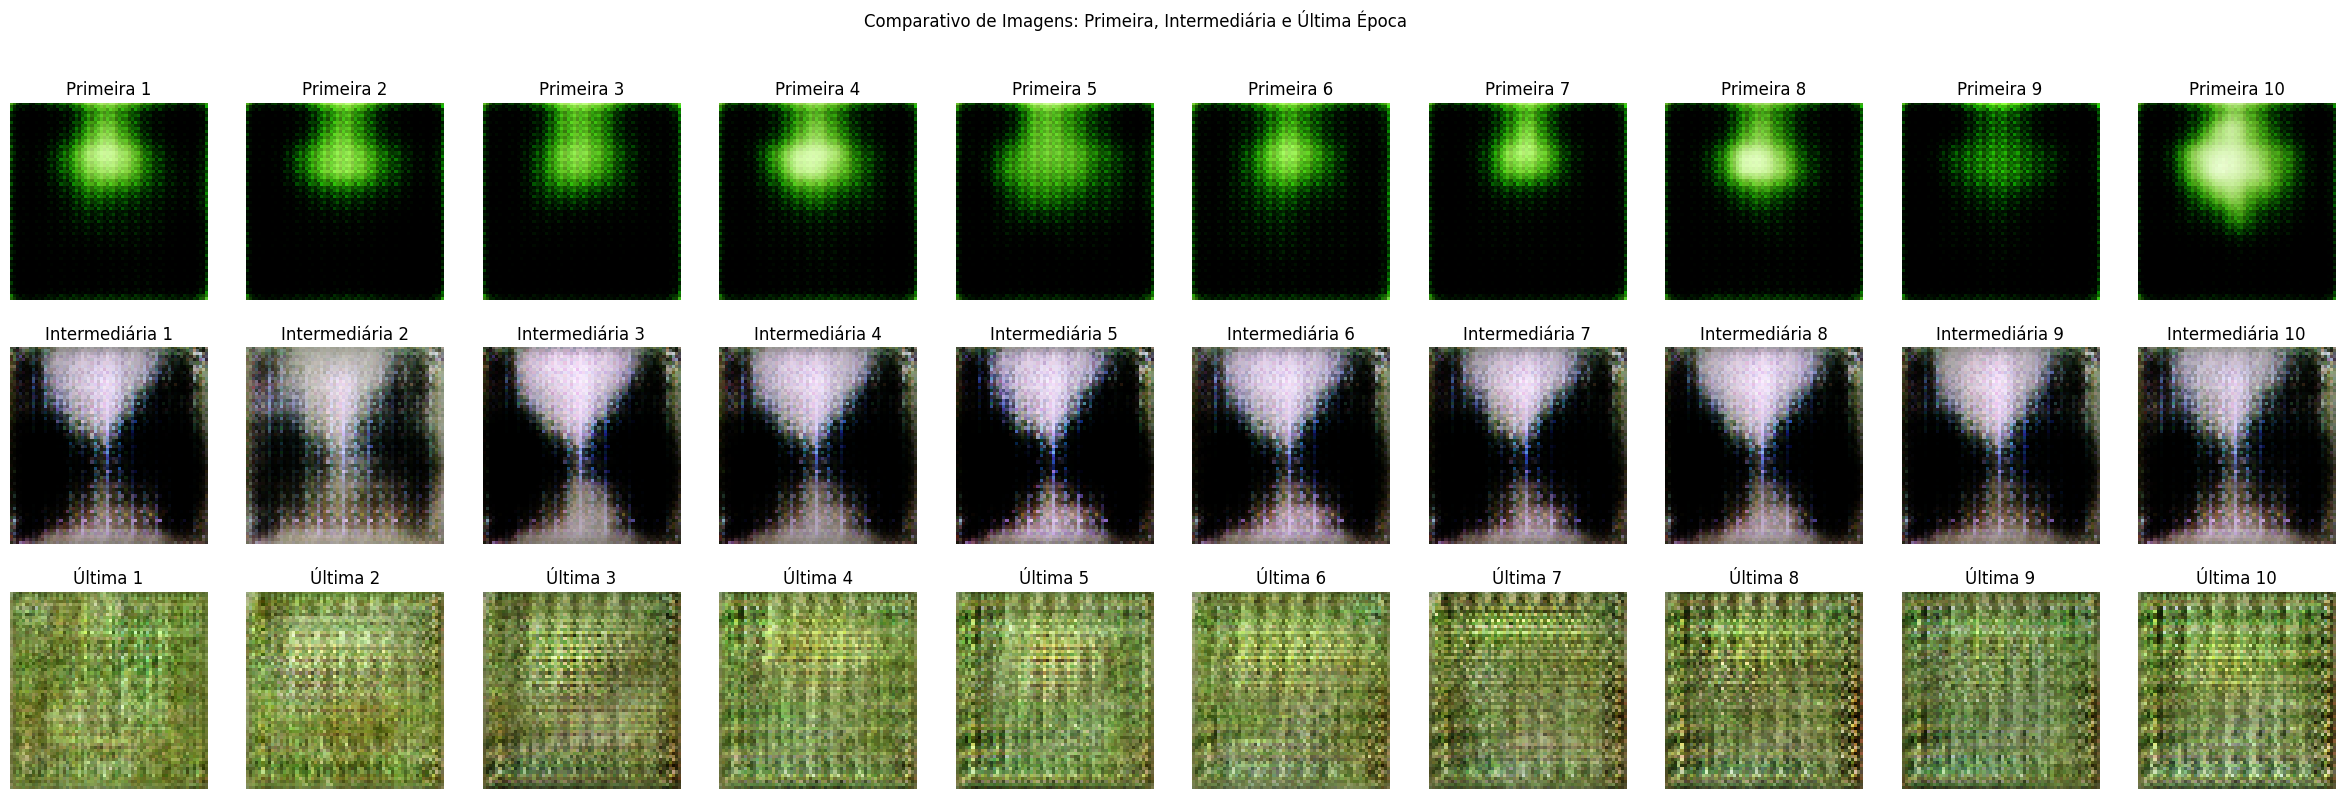

In [ ]:
# Exemplos de uso:

type_gan = 'dcgan'

first_epoch_dir = f'imgs_generate/{type_gan}/epoch_000'  # Diretório da primeira época
mid_epoch_dir = f'imgs_generate/{type_gan}/epoch_{epochs//2:03d}'  # Diretório da época intermediária
last_epoch_dir = f'imgs_generate/{type_gan}/epoch_{epochs-1:03d}'  # Diretório da última época

# Chama a função para plotar o comparativo das imagens geradas em três épocas diferentes
plot_comparative_images_three_epochs(first_epoch_dir, mid_epoch_dir, last_epoch_dir, num_img=10)

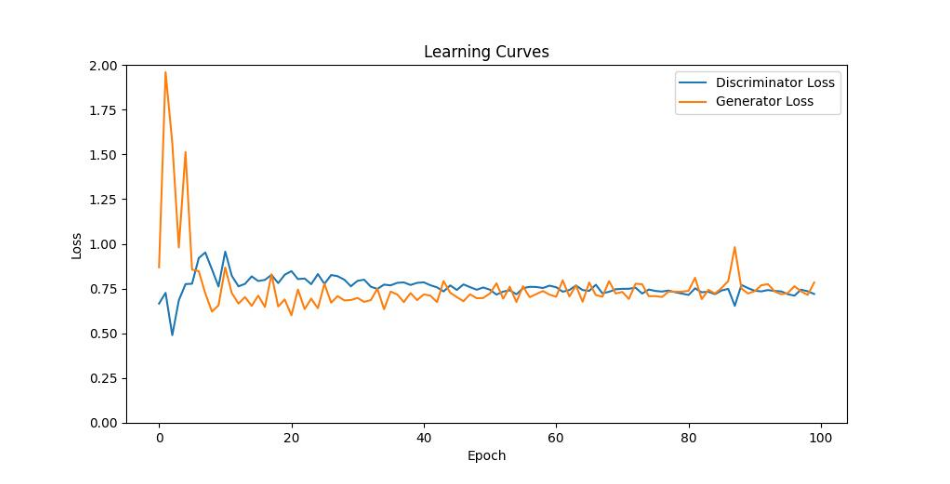

In [ ]:
plot_learning_curves_from_file(type_gan)

## Self Attention GANs

![](https://github.com/heykeetae/Self-Attention-GAN/blob/master/image/main_model.PNG?raw=true)

### Dados

In [ ]:

# Importa a biblioteca keras, que é usada para construir e treinar modelos de deep learning
import keras

# Define o caminho das imagens no Google Drive
PATH_IMGS = '/content/drive/MyDrive/FIA/INTELIGÊNCIA ARTIFICIAL II/DEEP LEARNING/PROJETO DEEP LEARNING/classificacao-imagem-tipos-cenarios-pelo-mundo/train/forest'

# Cria um dataset de imagens a partir do diretório especificado, sem rótulos (label_mode=None), com tamanho de imagem 128x128 e batch de 32 imagens
dataset = keras.utils.image_dataset_from_directory(
    PATH_IMGS, label_mode=None, image_size=(128, 128), batch_size=32
)
# Normaliza as imagens para o intervalo [0, 1], dividindo os valores dos pixels por 255
dataset = dataset.map(lambda x: x / 255.0)

Found 2271 files.


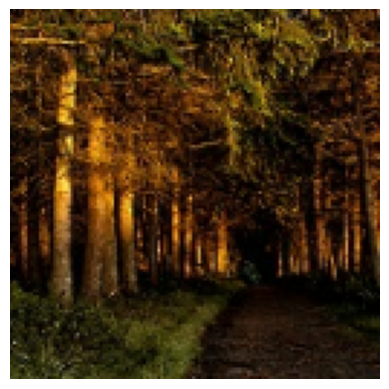

In [ ]:
# Importa a biblioteca matplotlib para plotagem de gráficos e visualização de imagens
import matplotlib.pyplot as plt

# Itera sobre o dataset e plota a primeira imagem para visualização
for x in dataset:
    plt.axis("off")  # Remove os eixos da plotagem
    plt.imshow((x.numpy() * 255).astype("int32")[0])  # Exibe a imagem (converte de volta para o intervalo [0, 255] e para o tipo int)
    break  # Sai do loop após exibir a primeira imagem

In [ ]:
# Redefine o dataset, agora com tamanho de imagem 64x64, para agilizar o treinamento
dataset = keras.utils.image_dataset_from_directory(
    PATH_IMGS, label_mode=None, image_size=(64, 64), batch_size=32
)

# Normaliza as imagens novamente para o intervalo [0, 1]
dataset = dataset.map(lambda x: x / 255.0)

Found 2271 files.


In [ ]:
from tensorflow.keras.layers import Layer
from tensorflow.keras import layers
import tensorflow as tf

# Define a classe SelfAttention que herda da classe Layer do TensorFlow
class SelfAttention(Layer):
    def __init__(self, channels, **kwargs):
        super(SelfAttention, self).__init__(**kwargs)  # Inicializa a superclasse Layer
        self.channels = channels  # Define o número de canais para a camada

    # Constrói a camada definindo as operações que serão realizadas
    def build(self, input_shape):
        # Define as convoluções que serão usadas na camada de self-attention
        self.f = layers.Conv2D(self.channels // 8, kernel_size=1, strides=1, padding='same')
        self.g = layers.Conv2D(self.channels // 8, kernel_size=1, strides=1, padding='same')
        self.h = layers.Conv2D(self.channels // 2, kernel_size=1, strides=1, padding='same')
        self.v = layers.Conv2D(self.channels, kernel_size=1, strides=1, padding='same')

    # Define a lógica para a passagem da informação na camada
    def call(self, x):
        # Obtém o tamanho do batch, altura, largura e número de canais da entrada
        batch_size, height, width, channels = tf.shape(x)[0], tf.shape(x)[1], tf.shape(x)[2], tf.shape(x)[3]

        # Aplica as convoluções definidas anteriormente
        f = self.f(x)
        g = self.g(x)
        h = self.h(x)

        # Redimensiona os tensores para facilitar a multiplicação matricial
        f = tf.reshape(f, [batch_size, height * width, channels // 8])
        g = tf.reshape(g, [batch_size, height * width, channels // 8])
        h = tf.reshape(h, [batch_size, height * width, channels // 2])

        # Calcula a atenção como o produto de g e f transposto
        s = tf.matmul(g, f, transpose_b=True)
        beta = tf.nn.softmax(s, axis=-1)  # Aplica a função softmax para normalizar

        # Aplica a atenção a h e redimensiona o tensor de volta ao formato original
        o = tf.matmul(beta, h)
        o = tf.reshape(o, [batch_size, height, width, channels // 2])
        o = self.v(o)  # Aplica a última convolução

        return o + x  # Retorna a entrada mais a atenção calculada

### Discriminador

In [ ]:
from tensorflow import keras

In [ ]:
discriminator = keras.Sequential(
    [
        keras.Input(shape=(64, 64, 3)),
        layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.1),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.1),
        SelfAttention(128),
        layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.1),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid"),
    ],
    name="discriminator",
)

discriminator.summary()

Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 128)         │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ self_attention (SelfAttention)       │ (None, 16, 16, 128)         │          20,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           8,193 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 425,505 (1.62 MB)

 Trainable params: 425,505 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

### Gerador

In [ ]:
latent_dim = 128

generator = keras.Sequential(
    [
        keras.Input(shape=(latent_dim,)),
        layers.Dense(8 * 8 * 128),
        layers.Reshape((8, 8, 128)),
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.1),  # Ativação LeakyReLU
        layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.1),
        SelfAttention(256),
        layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.1),
        layers.Conv2D(3, kernel_size=5, padding="same", activation="sigmoid"),
    ],
    name="generator",
)

generator.summary()

Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 8192)                │       1,056,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 16, 16, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 32, 32, 256)         │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ self_attention_1 (SelfAttention)     │ (None, 32, 32, 256)         │          82,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 64, 64, 512)         │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 64, 64, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 64, 64, 3)           │          38,403 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,062,019 (15.50 MB)

 Trainable params: 4,062,019 (15.50 MB)

 Non-trainable params: 0 (0.00 B)

## SAGAN

In [ ]:
# Importa operações do Keras necessárias para a definição da classe GAN
from keras import ops

# Importa módulos do TensorFlow necessários para a construção do modelo
import tensorflow as tf

# Define a classe GAN que herda da classe Model do Keras
class SAGAN(keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super().__init__()  # Inicializa a superclasse Model
        self.discriminator = discriminator  # Atribui o discriminador
        self.generator = generator  # Atribui o gerador
        self.latent_dim = latent_dim  # Define a dimensão latente
        self.seed_generator = keras.random.SeedGenerator(1337)  # Define um gerador de sementes para reprodutibilidade

    # Define o método de compilação do modelo GAN
    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super().compile()  # Chama o método de compilação da superclasse
        self.d_optimizer = d_optimizer  # Define o otimizador do discriminador
        self.g_optimizer = g_optimizer  # Define o otimizador do gerador
        self.loss_fn = loss_fn  # Define a função de perda
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")  # Define a métrica de perda do discriminador
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")  # Define a métrica de perda do gerador

    # Define as métricas utilizadas pelo modelo
    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    # Define o passo de treinamento do modelo GAN
    def train_step(self, real_images):
        # Obtém o tamanho do batch das imagens reais
        batch_size = ops.shape(real_images)[0]
        # Gera pontos aleatórios no espaço latente
        random_latent_vectors = keras.random.normal(
            shape=(batch_size, self.latent_dim), seed=self.seed_generator
        )

        # Decodifica os vetores latentes para gerar imagens falsas
        generated_images = self.generator(random_latent_vectors)

        # Combina as imagens reais e geradas
        combined_images = ops.concatenate([generated_images, real_images], axis=0)

        # Cria rótulos para discriminar imagens reais e falsas
        labels = ops.concatenate(
            [ops.ones((batch_size, 1)), ops.zeros((batch_size, 1))], axis=0
        )
        # Adiciona ruído aleatório aos rótulos para aumentar a robustez
        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        # Treina o discriminador
        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        # Gera novos pontos aleatórios no espaço latente
        random_latent_vectors = keras.random.normal(
            shape=(batch_size, self.latent_dim), seed=self.seed_generator
        )

        # Cria rótulos para enganar o discriminador (todas as imagens são reais)
        misleading_labels = ops.zeros((batch_size, 1))

        # Treina o gerador (sem atualizar os pesos do discriminador)
        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))

        # Atualiza as métricas de perda
        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)
        return {
            "d_loss": self.d_loss_metric.result(),
            "g_loss": self.g_loss_metric.result(),
        }

### Monitoramento

In [ ]:
import matplotlib.pyplot as plt  # Importa a biblioteca matplotlib para plotagem de gráficos
import os # Import a biblioteca os para lidar com o sistema operacional
from tensorflow.keras.preprocessing.image import load_img, img_to_array

class GANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=3, latent_dim=128, type_gan='gan'):
        # Inicializa o callback com o número de imagens e a dimensão latente
        self.num_img = num_img
        self.latent_dim = latent_dim
        self.type_gan = type_gan
        # Define um gerador de semente para reprodutibilidade
        self.seed_generator = keras.random.SeedGenerator(42)
        # Cria o diretório para salvar as imagens geradas, se não existir
        if not os.path.exists(f'imgs_generate/{self.type_gan}'):
            os.makedirs(f'imgs_generate/{self.type_gan}')
        # Inicializa listas para armazenar as perdas do discriminador e do gerador
        self.d_losses = []
        self.g_losses = []

    def on_epoch_end(self, epoch, logs=None):
        # Cria um diretório para a época atual
        epoch_dir = os.path.join(f'imgs_generate/{self.type_gan}', f'epoch_{epoch:03d}')
        if not os.path.exists(epoch_dir):
            os.makedirs(epoch_dir)

        # Gera imagens a partir de vetores latentes aleatórios
        random_latent_vectors = keras.random.normal(
            shape=(self.num_img, self.latent_dim), seed=self.seed_generator
        )
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255  # Converte as imagens para a escala de 0-255
        generated_images = generated_images.numpy()  # Converte o tensor para numpy array

        # Salva cada imagem gerada na pasta da época atual
        for i in range(self.num_img):
            img = keras.utils.array_to_img(generated_images[i])
            img.save(os.path.join(epoch_dir, f'generated_img_{epoch:03d}_{i}.png'))

        # Armazena as perdas do discriminador e do gerador
        self.d_losses.append(logs["d_loss"])
        self.g_losses.append(logs["g_loss"])

        # Plota as curvas de aprendizado
        self.plot_learning_curves()

    def plot_learning_curves(self):
        # Cria uma figura para os gráficos de perda
        plt.figure(figsize=(10, 5))
        # Plota a perda do discriminador
        plt.plot(self.d_losses, label="Discriminator Loss")
        # Plota a perda do gerador
        plt.plot(self.g_losses, label="Generator Loss")
        # Adiciona rótulo ao eixo x
        plt.xlabel("Epoch")
        # Adiciona rótulo ao eixo y
        plt.ylabel("Loss")
        # Adiciona a legenda ao gráfico
        plt.legend()
        # Adiciona um título ao gráfico
        plt.title("Learning Curves")
        # Salva o gráfico em um arquivo
        plt.savefig(f'imgs_generate/{self.type_gan}/learning_curves.jpg')
        # Fecha a figura para liberar memória
        plt.close()



def plot_comparative_images_three_epochs(first_epoch_dir, mid_epoch_dir, last_epoch_dir, num_img=10):
    """
    Plota um comparativo das imagens geradas na primeira, intermediária e última época.

    Parameters:
    - first_epoch_dir: Diretório contendo as imagens da primeira época.
    - mid_epoch_dir: Diretório contendo as imagens da época intermediária.
    - last_epoch_dir: Diretório contendo as imagens da última época.
    - num_img: Número de imagens a serem comparadas.
    """
    # Lista de arquivos de imagens na primeira época
    first_epoch_images = sorted([os.path.join(first_epoch_dir, img) for img in os.listdir(first_epoch_dir)])[:num_img]
    # Lista de arquivos de imagens na época intermediária
    mid_epoch_images = sorted([os.path.join(mid_epoch_dir, img) for img in os.listdir(mid_epoch_dir)])[:num_img]
    # Lista de arquivos de imagens na última época
    last_epoch_images = sorted([os.path.join(last_epoch_dir, img) for img in os.listdir(last_epoch_dir)])[:num_img]

    # Cria uma figura para o comparativo
    fig, axes = plt.subplots(3, num_img, figsize=(num_img * 3, 9))
    fig.suptitle('Comparativo de Imagens: Primeira, Intermediária e Última Época')

    # Plota imagens da primeira época
    for i, img_path in enumerate(first_epoch_images):
        img = load_img(img_path)
        axes[0, i].imshow(img)
        axes[0, i].axis('off')
        axes[0, i].set_title(f"Primeira {i+1}")

    # Plota imagens da época intermediária
    for i, img_path in enumerate(mid_epoch_images):
        img = load_img(img_path)
        axes[1, i].imshow(img)
        axes[1, i].axis('off')
        axes[1, i].set_title(f"Intermediária {i+1}")

    # Plota imagens da última época
    for i, img_path in enumerate(last_epoch_images):
        img = load_img(img_path)
        axes[2, i].imshow(img)
        axes[2, i].axis('off')
        axes[2, i].set_title(f"Última {i+1}")

    plt.show()

import matplotlib.image as m_img
import matplotlib.pyplot as plt
import os

def plot_learning_curves_from_file(type_gan='dcgan', figsize=(12, 8)):
    """
    Plota as curvas de aprendizado a partir de um arquivo salvo.

    Parameters:
    - type_gan: Tipo de GAN usado para gerar as imagens e salvar o arquivo.
    - width: Largura da figura.
    - height: Altura da figura.
    """
    # Caminho para o arquivo da curva de aprendizado
    learning_curves_path = f'imgs_generate/{type_gan}/learning_curves.jpg'

    # Verifica se o arquivo existe
    if os.path.exists(learning_curves_path):
        # Carrega a imagem da curva de aprendizado
        img = m_img.imread(learning_curves_path)
        # Define o tamanho da figura
        plt.figure(figsize=figsize)
        # Exibe a imagem
        plt.imshow(img)
        plt.axis('off')  # Remove os eixos
        plt.show()
    else:
        print(f"Arquivo de curva de aprendizado não encontrado em: {learning_curves_path}")


### Treinamento

In [ ]:
# Define o número de épocas para o treinamento do modelo SAGAN
epochs = 100 # Pelo menos 3 épocas para funcionar todo o código

# Inicializa o modelo GAN com discriminador, gerador e dimensão latente
sagan = SAGAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
# Compila o modelo com otimizadores e função de perda
sagan.compile(
    d_optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Otimizador para o discriminador
    g_optimizer=keras.optimizers.Adam(learning_rate=0.0001),  # Otimizador para o gerador
    loss_fn=keras.losses.BinaryCrossentropy(),  # Função de perda binária
)

# Treina o modelo com o conjunto de dados, número de épocas e callbacks
with tf.device("/device:GPU:0"):  # Especifica o uso de GPU para o treinamento
    sagan.fit(
        dataset, epochs=epochs, callbacks=[GANMonitor(num_img=10, latent_dim=latent_dim, type_gan='sagan')]
    )

Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 57s 406ms/step - d_loss: 0.5687 - g_loss: 1.0510
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - d_loss: 0.6391 - g_loss: 1.9105
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - d_loss: 0.2407 - g_loss: 1.8206
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 105ms/step - d_loss: 0.4488 - g_loss: 1.7327
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - d_loss: 0.5371 - g_loss: 2.9340
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - d_loss: 0.4060 - g_loss: 2.1712
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - d_loss: 0.5317 - g_loss: 3.1579
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - d_loss: 0.4523 - g_loss: 1.4821
Epoch 9/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - d_loss: 0.7240 - g_loss: 1.5879
Epoch 10/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - d_loss: 0.5321 - g_loss: 1.3107
Epoch 11/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - d_loss: 0.6756 - g_loss: 2.4516
Epoch 12/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 

### Visualizando

In [ ]:
print(epochs)

100


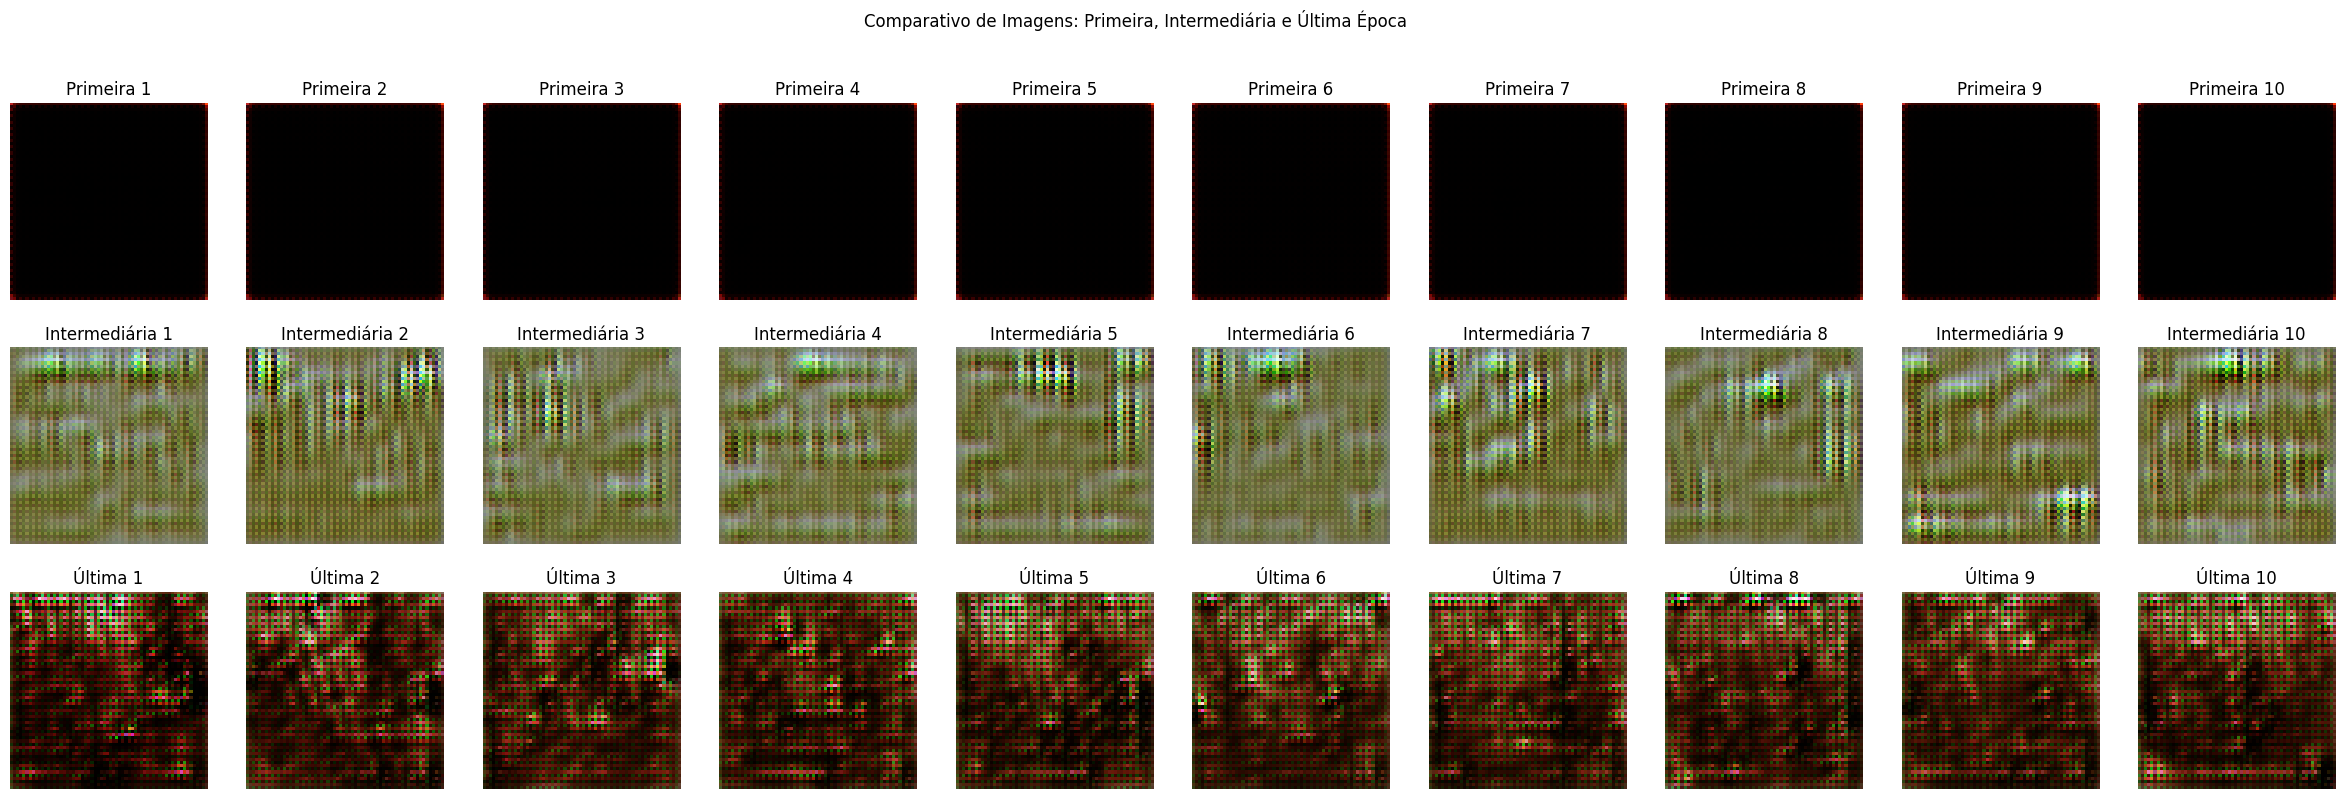

In [ ]:
# Exemplos de uso:

type_gan = 'sagan'

first_epoch_dir = f'imgs_generate/{type_gan}/epoch_000'  # Diretório da primeira época
mid_epoch_dir = f'imgs_generate/{type_gan}/epoch_{epochs//2:03d}'  # Diretório da época intermediária
last_epoch_dir = f'imgs_generate/{type_gan}/epoch_{epochs-1:03d}'  # Diretório da última época

# Chama a função para plotar o comparativo das imagens geradas em três épocas diferentes
plot_comparative_images_three_epochs(first_epoch_dir, mid_epoch_dir, last_epoch_dir, num_img=10)

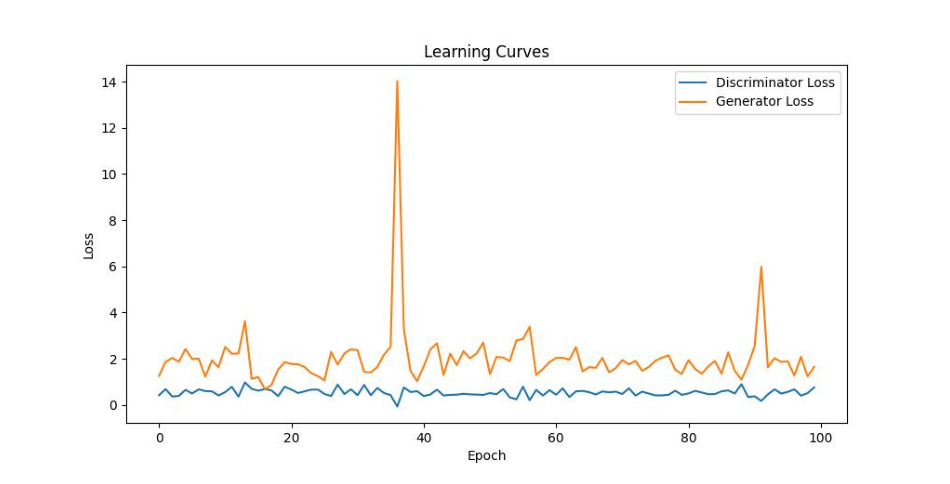

In [ ]:
plot_learning_curves_from_file(type_gan)